# Document Classification with KNeighbors

This is a use case of the application of KNeighbors on a practical problem
(Document Classification).

Its meant to illustrate the advantages and disadvantages of KNeighbors as a learning algorithm

The implementation is not efficient and the  results are definitely not state of the art.

For a more indepth description  how machine learning techniques are used in practice for text processing see 
the freely available [Information Retrieval](https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf) book online.

## Preliminaries

### Imports

In [1]:
import pickle
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import sys
sys.path.append("../..")
from E4525_ML import plots

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

### Data Directories

In [2]:
raw_data_dir=r"../../raw/C50/C50train"
test_dir    =r"../../raw/C50/C50test"
data_dir=r"../../data/C50"


## Document Data

### Corpus (List of documents)

In [5]:
documents_filename=data_dir+"/C50_documents.csv"
documents=pd.read_csv(documents_filename,index_col="document_id")
documents.head()

,filename,label
document_id,,
0,../../raw/C50/C50train/AaronPressman/106247new...,AaronPressman
1,../../raw/C50/C50train/AaronPressman/120600new...,AaronPressman
2,../../raw/C50/C50train/AaronPressman/120683new...,AaronPressman
3,../../raw/C50/C50train/AaronPressman/136958new...,AaronPressman
4,../../raw/C50/C50train/AaronPressman/137498new...,AaronPressman


In [6]:
test_documents_filename=data_dir+"/C50_test_documents.csv"
test_documents=pd.read_csv(test_documents_filename,index_col="document_id")
test_documents.head()

,filename,label
document_id,,
0,../../raw/C50/C50test/AaronPressman/421829news...,AaronPressman
1,../../raw/C50/C50test/AaronPressman/424074news...,AaronPressman
2,../../raw/C50/C50test/AaronPressman/42764newsM...,AaronPressman
3,../../raw/C50/C50test/AaronPressman/43033newsM...,AaronPressman
4,../../raw/C50/C50test/AaronPressman/433558news...,AaronPressman


### Load Pre-Trained Features

#### Set Features

In [7]:
set_features_filename=data_dir+"/"+"set_features.p"
set_features=pickle.load(open(set_features_filename,"rb"))
set_features=normalize(set_features)

In [8]:
set_test_features_filename=data_dir+"/"+"set_test_features.p"
set_test_features=pickle.load(open(set_test_features_filename,"rb"))
set_test_features=normalize(set_test_features)

#### Count Features

In [9]:
count_features_filename=data_dir+"/"+"count_features.p"
count_features=pickle.load(open(count_features_filename,"rb"))
count_features=normalize(count_features)

In [10]:
count_test_features_filename=data_dir+"/"+"count_test_features.p"
count_test_features=pickle.load(open(count_test_features_filename,"rb"))
count_test_features=normalize(count_test_features)

#### TF-IDF Features

In [11]:
tfidf_features_filename=data_dir+"/"+"tfidf_features.p"
tfidf_features=pickle.load(open(tfidf_features_filename,"rb"))

In [12]:
tfidf_test_features_filename=data_dir+"/"+"tfidf_test_features.p"
tfidf_test_features=pickle.load(open(tfidf_test_features_filename,"rb"))

## K-Neighbors Implementation

In [13]:
def find_neighbors(x,X,k):
    similarities=X.dot(x.T)
    similarities=np.ravel(similarities.todense())
    # find k-largest similarities instead of k-smallest distances
    indexes=np.argpartition(similarities,-k)[-k:] #https://docs.scipy.org/doc/numpy-1.8.0/reference/generated/numpy.argpartition.html
    return indexes

class KNeighbors:
    def __init__(self,k):
        self.k=k
    def fit(self,X,Y):
        self.X=X
        self.Y=Y      
    def predict(self,X):
        N=X.shape[0]
        y=np.empty(N,self.Y.dtype)
        for i1 in range(N):
            x=X[i1]
            indexes=find_neighbors(x,self.X,self.k)
            labels=self.Y[indexes]
            (values,counts) = np.unique(labels,return_counts=True)
            best=np.argmax(counts)
            y[i1]=values[best]
        return y

### Test of  Implementation

In [14]:
X=count_features
Y=documents["label"]

In [15]:
model=KNeighbors(3)
model.fit(X,Y)

In [16]:
doc=51
text1=X[doc]
y_pred=model.predict(text1)
print("True Author      =",Y[doc])
print("Predicted Author =",y_pred[0])

True Author      = AlanCrosby
Predicted Author = AlanCrosby


Let's check of the first 50 documents

In [17]:
X_short_test=count_test_features[:50]
Y_short_test=test_documents["label"][:50]
Y_short_pred=model.predict(X_short_test)
np.average(Y_short_pred==Y_short_test)

0.76

### Comparison to `Sklean` implementation

In [18]:
sk_model=KNeighborsClassifier(3)

In [19]:
sk_model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
Y_pred=sk_model.predict(X_short_test)

In [21]:
np.average(Y_pred==Y_short_test)

0.76

## Full Test Corpus Evaluation

### Set Features Evaluation

In [22]:
X=set_features
Y=documents["label"]
X_test=set_test_features
Y_test=test_documents["label"]

In [23]:
K=1
model=KNeighbors(K) #or KNeighbors(K), KNeighborsClassifier
model.fit(X,Y)
Y_pred=model.predict(X_test)
np.average(Y_pred==Y_test)

0.5964

In [24]:
K=5
model=KNeighbors(K) #or KNeighbors(K), KNeighborsClassifier
model.fit(X,Y)
Y_pred=model.predict(X_test)
np.average(Y_pred==Y_test)

0.6144

### Count Features Evaluation

In [25]:
X=count_features
Y=documents["label"]
X_test=count_test_features
Y_test=test_documents["label"]


In [26]:
K=1
model=KNeighbors(K) #or KNeighbors(K), KNeighborsClassifier
model.fit(X,Y)
Y_pred=model.predict(X_test)
np.average(Y_pred==Y_test)

0.5388

In [27]:
K=5
model=KNeighbors(K) #or KNeighbors(K), KNeighborsClassifier
model.fit(X,Y)
Y_pred=model.predict(X_test)
np.average(Y_pred==Y_test)

0.5272

### TF-IDF Features Evaluation

In [28]:
X=tfidf_features
Y=documents["label"]
X_test=tfidf_test_features
Y_test=test_documents["label"]


In [29]:
K=1
model=KNeighbors(K) #or KNeighbors(K), KNeighborsClassifier
model.fit(X,Y)
Y_pred=model.predict(X_test)
np.average(Y_pred==Y_test)

0.5432

In [30]:
K=5
model=KNeighbors(K) #or KNeighbors(K), KNeighborsClassifier
model.fit(X,Y)
Y_pred=model.predict(X_test)
np.average(Y_pred==Y_test)

0.5456

### Confusion Matrix 

In [31]:
classes=Y.unique()

We could use the confusion matrix to understand the  kind of errors that the model makes

Confusion matrix, without normalization
[[44  0  0 ...  0  0  0]
 [ 0 30  0 ...  3  0  0]
 [ 2  0 14 ...  0  0  0]
 ...
 [ 0  0  1 ... 33  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 15]]


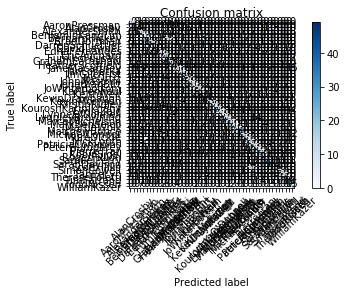

In [32]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)
plots.plot_confusion_matrix(cnf_matrix,classes)